# **Mount Google Drive**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# **Import Data Set**


In [ ]:
import pandas as pd

# Specify the file paths of the CSV files
file_paths = [
    '/content/drive/MyDrive/Olamide/Friday-WorkingHours-Morning.pcap_ISCX.csv',
    '/content/drive/MyDrive/Olamide/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    '/content/drive/MyDrive/Olamide/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
]

# Create an empty list to store the DataFrames
dataframes = []

# Loop through each file path
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

# **Data Profiling**
Profile the data to understand it

In [ ]:
# Print the number of rows
print("Number of Rows:", len(df))

# Print the number of columns
print("Number of Columns:", len(df.columns))

# Display the first few rows of the DataFrame
print(df.head())

# Get summary statistics of the numerical columns
print(df.describe())

# Check the data types of each column
print(df.dtypes)

# check column headers
print(df.columns)

Number of Rows: 703245
Number of Columns: 79
    Destination Port   Flow Duration   Total Fwd Packets  \
0               3268       112740690                  32   
1                389       112740560                  32   
2                  0       113757377                 545   
3               5355          100126                  22   
4                  0           54760                   4   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       16                         6448   
1                       16                         6448   
2                        0                            0   
3                        0                          616   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          1152                     403   
1                          5056                     403   
2                             0                       0   
3  

Print Values in target Variable to understand if botnet attacked the Iot

In [ ]:
# print unique values in the 'target' column
unique_values = df[' Label'].unique()

# Print unique values
for value in unique_values:
    print(value)

BENIGN
Bot
PortScan
DDoS


# **Data Cleaning**

Romove leading/trailing whitespace on dataset

In [ ]:
df.columns = df.columns.str.strip()

Check for missing values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values")
else:
    print("Missing Values:")
    print(missing_values)

Missing Values:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64


In [ ]:
# Exclude non-numeric column from DataFrame
numeric_df = df.drop('Label', axis=1)

# Fill numeric missing values with the mean
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Fill missing non-numerical data with the mode
df['Label'].fillna(df['Label'].mode()[0], inplace=True)

# Concatenate the imputed numeric DataFrame with the imputed non-numeric column
df = pd.concat([numeric_df, df['Label']], axis=1)

In [ ]:
# Check if missing values have been successfully replaced
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values")
else:
    print("Missing Values:")
    print(missing_values)

No missing values


Check for dublicates

In [ ]:
# Check for duplicates
duplicates = df.duplicated()
if duplicates.sum() > 0:
    print("Duplicates found. Removing duplicates...")
    df = df[~duplicates]
else:
    print("No duplicates found.")

Duplicates found. Removing duplicates...


In [ ]:
# Remove duplicates
df_unique = df.drop_duplicates()

# Dublicates successfully droped

# **Exploratory Data Analysis**
Print An analysis of Dataset to understand the relationships

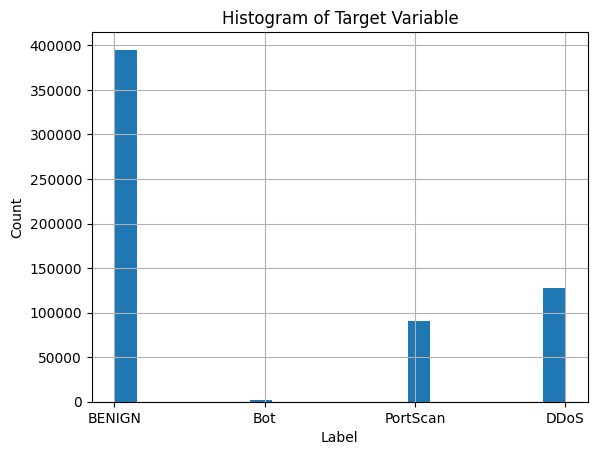

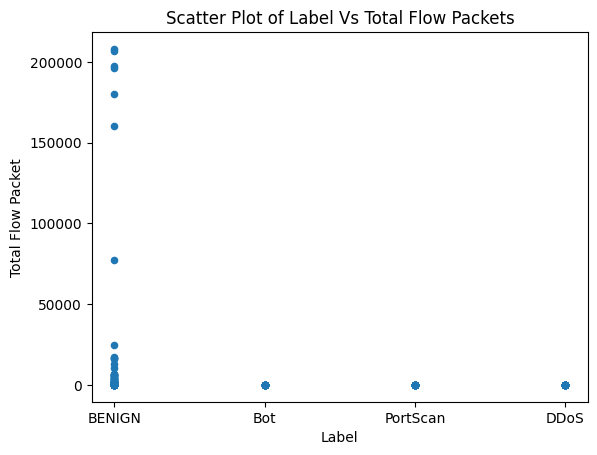

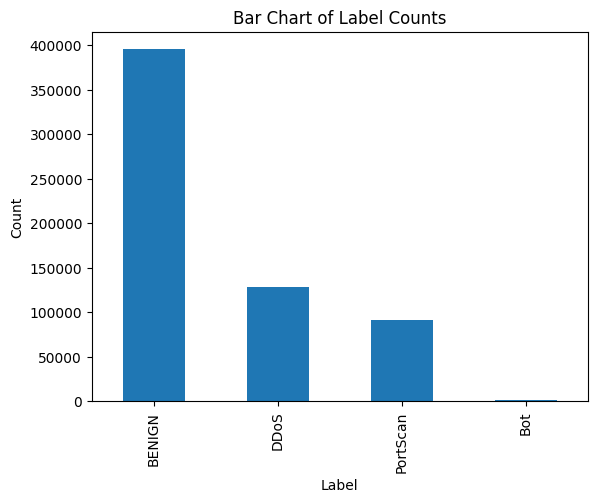

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Histogram of Label
df['Label'].hist(bins=20)
plt.title('Histogram of Target Variable')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Scatter plot of Label Vs Total Flow Packets
df.plot.scatter(x='Label', y='Total Fwd Packets')
plt.title('Scatter Plot of Label Vs Total Flow Packets')
plt.xlabel('Label')
plt.ylabel('Total Flow Packet')
plt.show()

# Bar chart of Label counts
df['Label'].value_counts().plot.bar()
plt.title('Bar Chart of Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# **Feature Enginerring**

In [ ]:
# Print all the columns
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

Feature and Target Variable Selection

In [ ]:
# Use all variables as featured target, hence, Label is droped from featured variables, which is defined as X
featured_variables = df.columns.drop('Label')
X = df[featured_variables]

Create a new variable 'Bot'

In [ ]:
# Create a new column 'Bot' with 1 for 'Bot' values and 0 for other values
df['Bot'] = df['Label'].apply(lambda x: 1 if x == 'Bot' else 0)

# Drop the original 'Label' column if needed
df.drop('Label', axis=1, inplace=True)

y = df['Bot']

# Target Variable 'Label', is converted to (1,0) and defined as 'y',
# where 1 = bot and non bot = 0

# **Split Into Train And Test Set**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Implement Model**

Light Gradient Boosting Machine (lightgbm) is the model to be used

In [ ]:
import lightgbm as lgb

# Check the shapes of the train and test data
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train data shape: (492715, 78)
Test data shape: (123179, 78)
Train target shape: (492715,)
Test target shape: (123179,)


In [ ]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

In [ ]:
# Set the parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt'
}

In [ ]:
# Train the LightGBM model
gbm = lgb.train(params, train_data)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1570, number of negative: 491145
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.145638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14513
[LightGBM] [Info] Number of data points in the train set: 492715, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003186 -> initscore=-5.745664
[LightGBM] [Info] Start training from score -5.745664


In [ ]:
# Make predictions on the test data
y_pred = gbm.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# **Evaluation Parameters**

In [ ]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9979947880726423


In [ ]:
from sklearn.metrics import classification_report

target_names = ['no bot', 'bot']
# Print Classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      no bot       1.00      1.00      1.00    122796
         bot       0.63      0.86      0.73       383

    accuracy                           1.00    123179
   macro avg       0.81      0.93      0.86    123179
weighted avg       1.00      1.00      1.00    123179



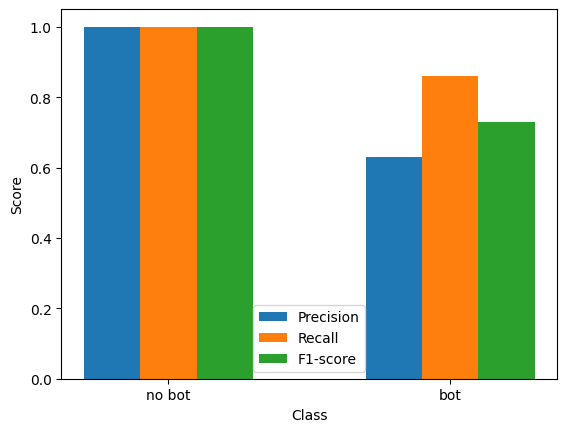

In [ ]:
import numpy as np

# Define the class labels and corresponding metrics
class_labels = ['no bot', 'bot']
precision = [1.00, 0.63]
recall = [1.00, 0.86]
f1_score = [1.00, 0.73]
support = [122796, 383]

# Define the x-axis tick positions
x_ticks = np.arange(len(class_labels))

# Plot precision, recall, and f1-score
plt.bar(x_ticks, precision, width=0.2, label='Precision')
plt.bar(x_ticks + 0.2, recall, width=0.2, label='Recall')
plt.bar(x_ticks + 0.4, f1_score, width=0.2, label='F1-score')

# Set the x-axis tick labels and axis labels
plt.xticks(x_ticks + 0.2, class_labels)
plt.xlabel('Class')
plt.ylabel('Score')

# Add a legend
plt.legend()

# Show the plot
plt.show()